In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from ast import literal_eval
import os
import sys
import gc

In [2]:
# Select the GPU to run on
cuda = torch.device('cuda:0')
torch.cuda.set_device(0)

In [9]:
# Load in the tensor of attention weights
#attention_weights = torch.load('../../data/column_attentions/embeddings_5fog_d.pt', map_location=cuda)
attention_weights = torch.load('../../data/column_attentions/convnet_attentions_2qke_e_128.pt', map_location=cuda)
print(attention_weights.shape)

In [7]:
# Select a single attention map and visualise it with a heatmap
example_attention_map = attention_weights[0, 11, 11, 40, :, :].cpu().numpy()
print(example_attention_map.shape)

# Plot the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(example_attention_map, cmap='viridis', square=True, cbar=False)
plt.show()

AttributeError: 'numpy.float32' object has no attribute 'cpu'

In [5]:
# Select 16 attention maps and visualise them as heatmaps in a 4x4 grid
attention_maps = attention_weights[0, 10, 9, 1:17, :, :].cpu().numpy()
print(attention_maps.shape)

# Plot the heatmaps
fig, axs = plt.subplots(4, 4, figsize=(4, 4))
for i in range(4):
    for j in range(4):
        sns.heatmap(attention_maps[i * 4 + j, :, :], cmap='viridis', square=True, cbar=False, ax=axs[i, j])
        axs[i, j].axis('off')

# Decrease the spacing between the heatmaps
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()


IndexError: too many indices for array: array is 4-dimensional, but 6 were indexed

(12, 16, 128, 128)


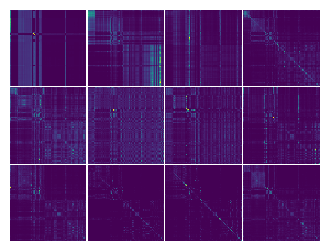

In [7]:
# Select 16 attention maps and visualise them as heatmaps in a 4x4 grid. Do this for all 12 layers and arrange them in a 3x4 grid.
attention_maps = attention_weights[0, 0:12, 5, 1:17, :, :].cpu().numpy()
print(attention_maps.shape)

# Plot the heatmaps
fig, axs = plt.subplots(3, 4, figsize=(4, 3))
for i in range(3):
    for j in range(4):
        sns.heatmap(attention_maps[i * 4 + j, 0, :, :], cmap='viridis', square=True, cbar=False, ax=axs[i, j])
        axs[i, j].axis('off')

# Decrease the spacing between the heatmaps
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()


In [6]:
attention_maps = attention_weights[0, 0:12, 5, 1:17, :, :].cpu().numpy()

fig = plt.figure(figsize=(16, 12))
outer = gridspec.GridSpec(3, 4, wspace=0.05, hspace=0.1)

for i in range(12):
    inner = gridspec.GridSpecFromSubplotSpec(4, 4,
                    subplot_spec=outer[i], wspace=0.05, hspace=0.05)
    

    for j in range(16):
        ax = plt.Subplot(fig, inner[j])
        sns.heatmap(attention_maps[i, j, :, :], cmap='viridis', square=True, cbar=False, ax=ax)
        ax.axis('off')
        if j == 0:
            ax.set_title(i + 1)
        fig.add_subplot(ax)

IndexError: too many indices for array: array is 4-dimensional, but 6 were indexed

In [6]:
torch.cuda.empty_cache()

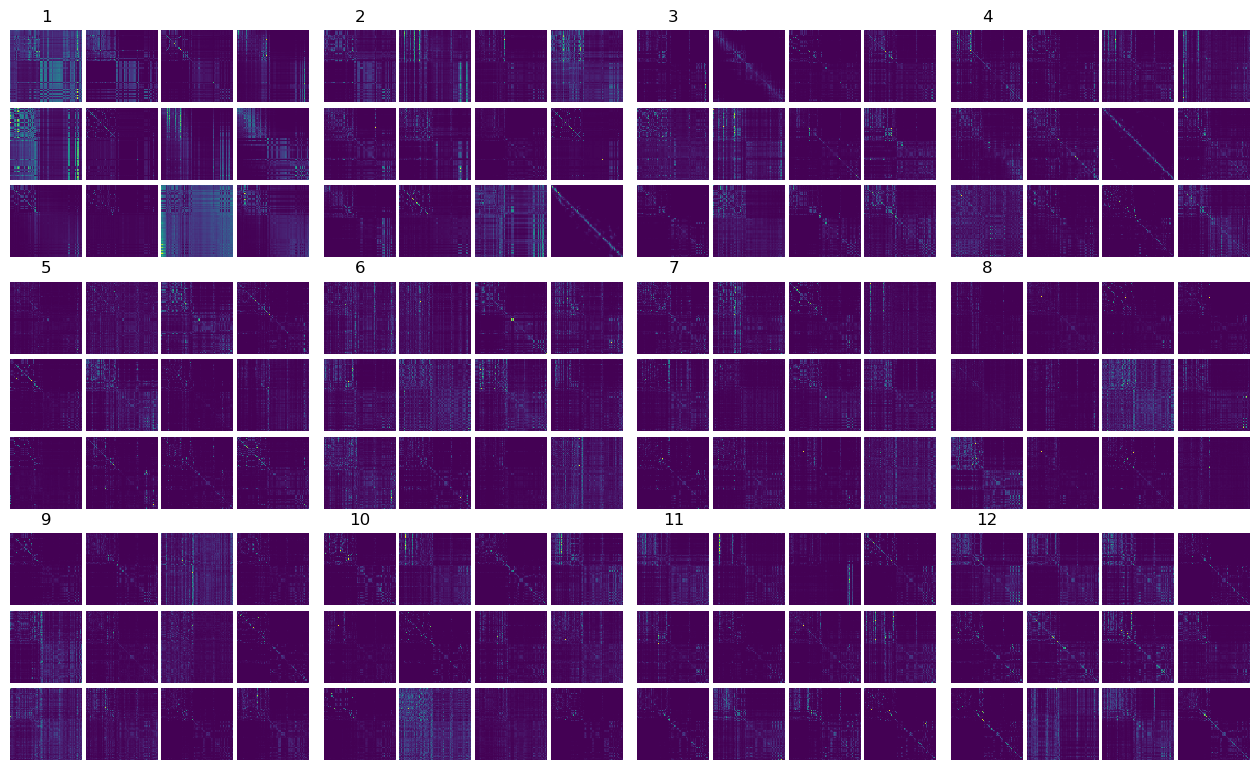

In [6]:
attention_maps = attention_weights[0, 0:12, 0:12, 5, :, :].cpu().numpy()

fig = plt.figure(figsize=(16, 9.5))
outer = gridspec.GridSpec(3, 4, wspace=0.05, hspace=0.1)

for i in range(12):
    inner = gridspec.GridSpecFromSubplotSpec(3, 4, subplot_spec=outer[i], wspace=0.05, hspace=0.05)
    for j in range(12):
        ax = plt.Subplot(fig, inner[j])
        sns.heatmap(attention_maps[i, j, :, :], cmap='viridis', square=True, cbar=False, ax=ax)
        ax.axis('off')
        if j == 0:
            ax.set_title(i + 1)
        fig.add_subplot(ax)

(128, 128)


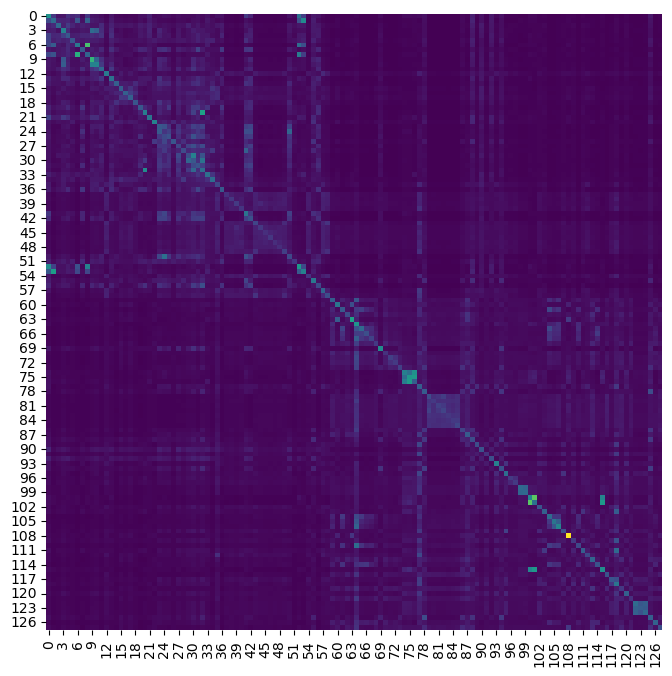

In [12]:
# Sum the attention maps across the 12 layers and heads and visualise the resulting attention map
attention_maps = attention_weights[0, 0:12, 0:12, 120, :, :].cpu().numpy()
attention_maps = np.sum(attention_maps, axis=(0, 1))
print(attention_maps.shape)

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(attention_maps, cmap='viridis', square=True, cbar=False)
plt.show()

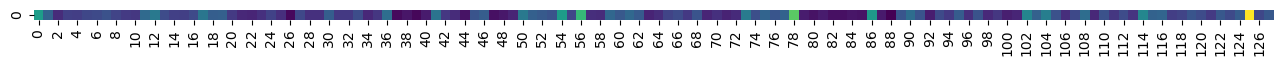

In [13]:
# Sum the attention maps across the 12 layers and heads and visualise the resulting attention map
attention_maps = attention_weights[0, 0:12, 0:12, 66, :, :].cpu().numpy()
attention_maps = np.sum(attention_maps, axis=(0, 1))
col_sums = np.sum(attention_maps, axis=0)
col_sums = np.reshape(col_sums, (1, 128))

# Plot the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(col_sums, cmap='viridis', square=True, cbar=False)
plt.show()


In [8]:
# Create a np array of the diagonal values of the attention maps
attention_maps = attention_weights[0, 0:12, 0:12, :, :, :].cpu().numpy()
output_array = np.zeros((144, 128, attention_maps.shape[2]))
for i in range(12):
    for j in range(12):
        for k in range(attention_maps.shape[2]):
            output_array[i * 12 + j, :, k] = np.diag(attention_maps[i, j, k, :, :])

# Sum the output array by column
col_sums = np.sum(output_array, axis=0)

# Plot the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(col_sums, cmap='viridis', square=True, cbar=False)
plt.show()

IndexError: too many indices for array: array is 4-dimensional, but 6 were indexed

In [7]:

# Do the same summation for 16 different attention maps
attention_maps = attention_weights[0, 0:12, 0:12, :, :, :].cpu().numpy()
attention_maps = np.sum(attention_maps, axis=(0, 1))
top_rows = attention_maps[:, 0, :]
top_cols = attention_maps[:, :, 0]
# Reshape top_rows and top_cols to have the same shape as each other, then add them together
top_rows = np.reshape(top_rows, (top_rows.shape[0], top_rows.shape[1]))
top_cols = np.reshape(top_cols, (top_cols.shape[0], top_cols.shape[1]))
sequence_vectors = top_rows + top_cols

# Create a numpy list of the sequence vectors
seq_vector_list = []
for i in range(sequence_vectors.shape[1]):
    seq_vector_list.append(sequence_vectors[:, i])
print(len(seq_vector_list))

# Create a numpy list of the residue vectors
res_vector_list = []
for i in range(sequence_vectors.shape[0]):
    res_vector_list.append(sequence_vectors[i, :])
print(len(res_vector_list))

gc.collect()
print(top_rows.shape, top_cols.shape, sequence_vectors.shape)

# Plot the heatmap
fig = plt.figure(figsize=(16, 16))
sns.heatmap(np.transpose(sequence_vectors), cmap='viridis', square=True, cbar=False)
plt.show()

IndexError: too many indices for array: array is 4-dimensional, but 6 were indexed

/home/vera/miniconda3/envs/SE3-nvidia/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 2 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(293, 128)


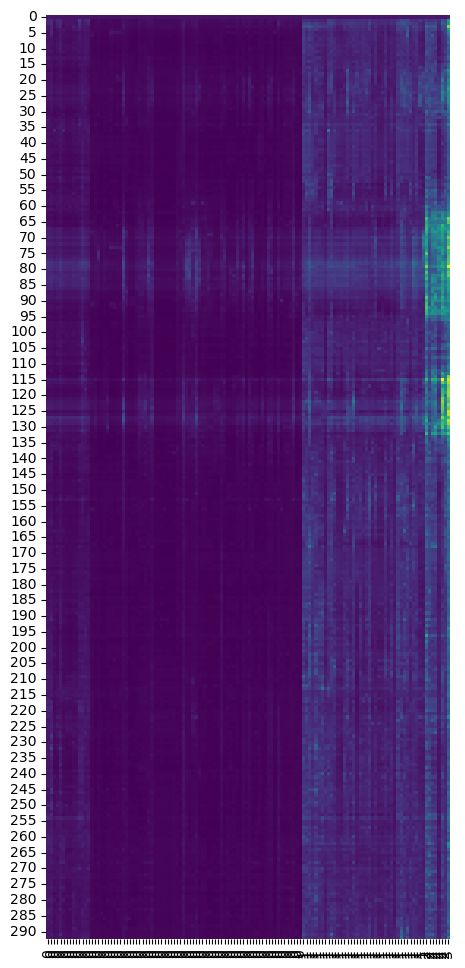

In [16]:
NUM_CLUSTERS = 4

# Cluster the sequence vectors using K-Means
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42).fit(seq_vector_list)
print(kmeans.labels_)

# Sort the sequence vectors by cluster label
sorted_seq_vector_list = []
for i in range(NUM_CLUSTERS):
    sorted_seq_vector_list.append([])
for i in range(len(kmeans.labels_)):
    sorted_seq_vector_list[kmeans.labels_[i]].append(seq_vector_list[i])
all_sorted_seq_vector_list = [vector for cluster in sorted_seq_vector_list for vector in cluster]

# Stack the sorted sequence vectors into a numpy array
sorted_sequence_vectors = np.stack(all_sorted_seq_vector_list, axis=1)
print(sorted_sequence_vectors.shape)

# Create a heatmap of the sorted sequence vectors
fig = plt.figure(figsize=(6, 12))

# Sort the kmeans labels
sorted_kmeans_labels = sorted(kmeans.labels_)
sns.heatmap(sorted_sequence_vectors, cmap='viridis', square=True, cbar=False, xticklabels=sorted_kmeans_labels)
plt.show()

In [17]:
attention_maps = attention_weights[0, 0:12, 0:12, :, :, :].cpu().numpy()
attention_maps = np.sum(attention_maps, axis=(0, 1))
col_sums = np.sum(attention_maps, axis=1)
print(attention_maps.shape, col_sums.shape)

(293, 128, 128) (293, 128)


(293, 128, 128) (293, 128)
128


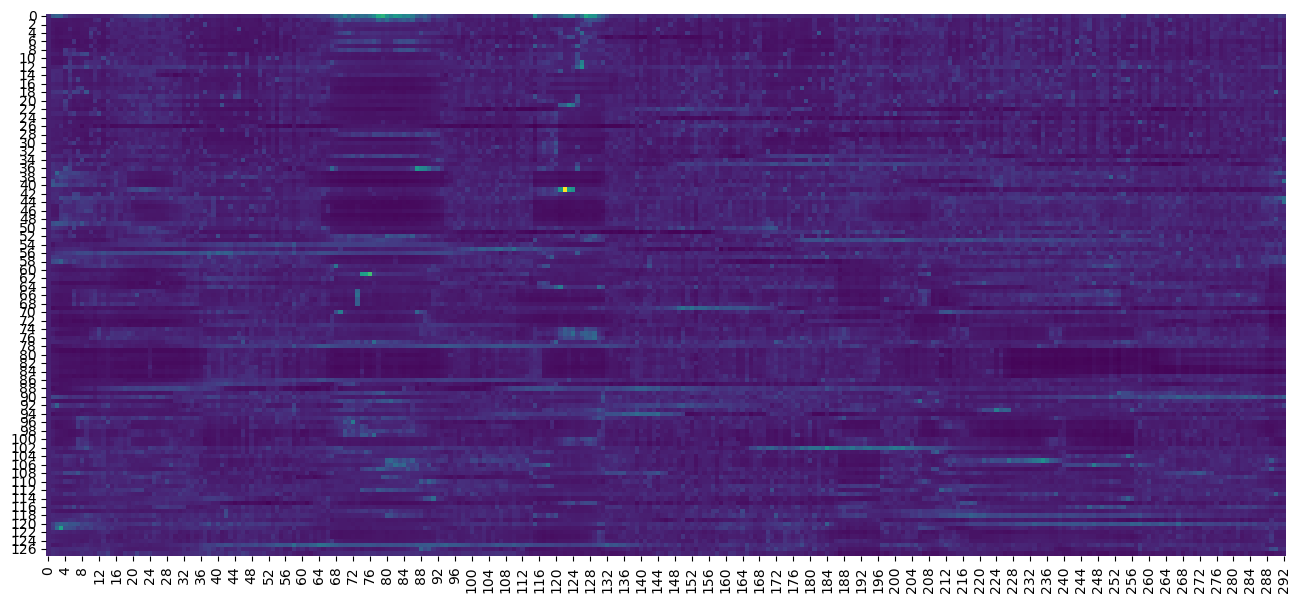

In [18]:
NUM_CLUSTERS = 4

attention_maps = attention_weights[0, 0:12, 0:12, :, :, :].cpu().numpy()
attention_maps = np.sum(attention_maps, axis=(0, 1))
col_sums = np.sum(attention_maps, axis=1)
print(attention_maps.shape, col_sums.shape)

# Create a numpy list of the column sums
col_vector_list = []
for i in range(col_sums.shape[1]):
    col_vector_list.append(col_sums[:, i])
print(len(col_vector_list))

# Create a heatmap of the sequence vectors and cluster labels
fig = plt.figure(figsize=(16, 16))
sns.heatmap(np.transpose(col_sums), cmap='viridis', square=True, cbar=False)
plt.show()

(293, 128, 128) (293, 128)
128
[1 1 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 0 2 0 2 0 2 0 2 2 2 2 1 2 3 1
 3 3 3 3 2 2 3 3 3 3 3 3 3 2 3 1 1 1 2 1 3 3 3 0 1 2 2 2 2 2 2 2 0 3 0 0 0
 2 2 2 1 1 0 0 0 0 0 0 0 1 0 2 1 3 1 3 1 2 1 0 0 0 0 2 2 1 2 2 1 1 1 2 2 2
 2 1 3 2 2 3 1 3 0 3 3 0 0 2 1 3 0]
(293, 128)


/home/vera/miniconda3/envs/SE3-nvidia/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


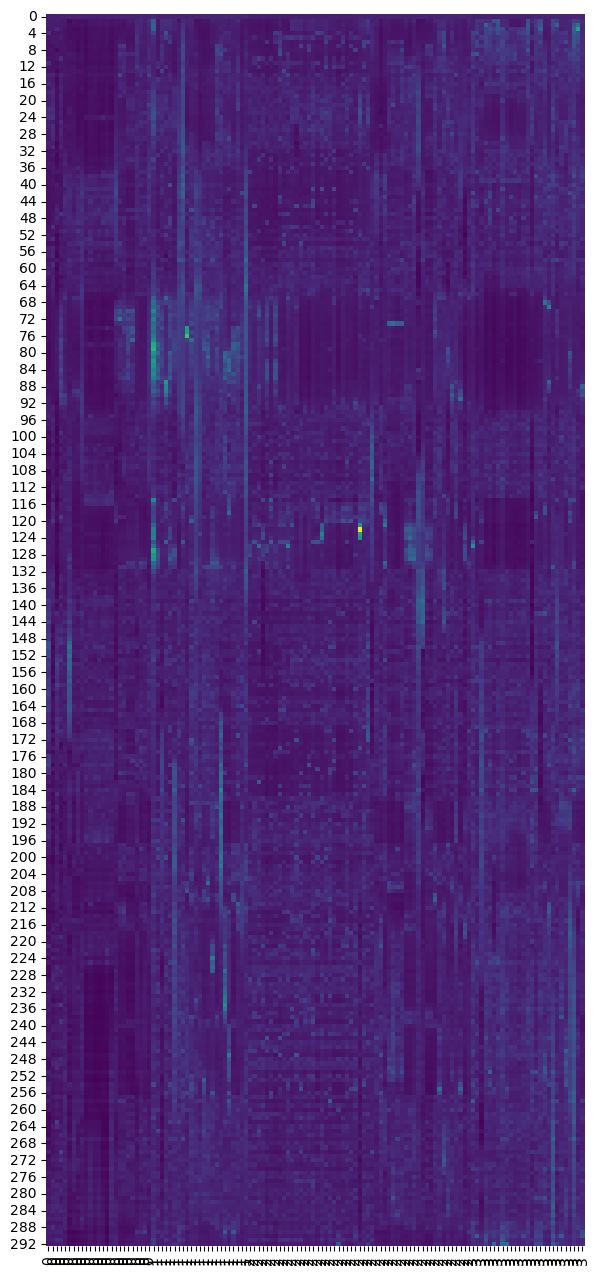

In [19]:
NUM_CLUSTERS = 4

attention_maps = attention_weights[0, 0:12, 0:12, :, :, :].cpu().numpy()
attention_maps = np.sum(attention_maps, axis=(0, 1))
col_sums = np.sum(attention_maps, axis=1)
print(attention_maps.shape, col_sums.shape)

# Create a numpy list of the column sums
col_vector_list = []
for i in range(col_sums.shape[1]):
    col_vector_list.append(col_sums[:, i])
print(len(col_vector_list))


# Cluster the sequence vectors using K-Means
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=1).fit(col_vector_list)
print(kmeans.labels_)

# # Create a heatmap of the sequence vectors and cluster labels
# fig = plt.figure(figsize=(16, 48))
# sns.heatmap(col_sums, cmap='viridis', square=True, cbar=False, xticklabels=kmeans.labels_)
# plt.show()


# Sort the sequence vectors by cluster label
sorted_col_sum_list = []
for i in range(NUM_CLUSTERS):
    sorted_col_sum_list.append([])
for i in range(len(kmeans.labels_)):
    sorted_col_sum_list[kmeans.labels_[i]].append(col_vector_list[i])
all_sorted_col_sum_list = [vector for cluster in sorted_col_sum_list for vector in cluster]

# Stack the sorted sequence vectors into a numpy array
sorted_sums = np.stack(all_sorted_col_sum_list, axis=1)
print(sorted_sums.shape)

# Create a heatmap of the sorted sequence vectors
fig = plt.figure(figsize=(16, 16))

# Sort the kmeans labels
sorted_kmeans_labels = sorted(kmeans.labels_)
sns.heatmap(sorted_sums, cmap='viridis', square=True, cbar=False, xticklabels=sorted_kmeans_labels)
plt.show()

In [20]:
NUM_CLUSTERS = 3

attention_maps = attention_weights[0, 0:12, 0:12, :, :, :].cpu().numpy()
summed_maps = np.sum(attention_maps, axis=(0, 1))
col_sums = np.sum(attention_maps, axis=1)

# Create a numpy list of the column sums
col_sum_list = []
for i in range(col_sums.shape[1]):
    col_sum_list.append(col_sums[:, i])

# Cluster the sequence vectors using K-Means
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=0).fit(col_sum_list)

# Create a list of clusters that each contain a list of the indices of the sequences belonging to that cluster
clusters = [[] for i in range(NUM_CLUSTERS)]
for i, seq in enumerate(kmeans.labels_):
    clusters[seq].append(i)x

for cluster in clusters:
    print(len(cluster))

ValueError: Found array with dim 4. KMeans expected <= 2.

# MSA-format destillations of the column attentions

In [6]:
# Load in the tensor of attention weights
attention_weights = torch.load('../../data/column_attentions/col_maps_5fog_d.pt')
print(attention_weights.shape)

# Works really well!
# Query sums seems to be the most useful feature

In [ ]:
# Load in the tensor of attention weights
attention_weights = torch.load('../../data/column_attentions/col_maps_1c3h_a.pt')
print(attention_weights.shape)

# Works well!

torch.Size([1, 12, 12, 138, 128, 128])


In [3]:
# Load in the tensor of attention weights
attention_weights = torch.load('../../data/column_attentions/col_maps_1bht_a.pt')
print(attention_weights.shape)

# Does not seem to work

torch.Size([1, 12, 12, 177, 128, 128])


### Summing the columns of the summed attention maps

In [15]:
def display_output_heatmap(data, title):
    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(24, 4))
    sns.heatmap(data, cmap='viridis', square=True, cbar=False, xticklabels=10, yticklabels=8)
    plt.title(title)
    plt.show()

In [13]:
# Make the maps numpy arrays and sum them
attention_maps = attention_weights[0, 0:12, 0:12, :, :, :].cpu().numpy()
summed_maps = np.sum(attention_maps, axis=(0, 1))

# col_sums = np.sum(summed_maps, axis=1)
# col_sums = np.transpose(col_sums)
# col_sum_list = [col_sums[:, i] for i in range(col_sums.shape[1])]
# display_output_heatmap(col_sums, "Column Sums")

query_col = summed_maps[:, 0, :]
query_row = summed_maps[:, :, 0]
query_col = np.reshape(query_col, (query_col.shape[0], query_col.shape[1]))
query_row = np.reshape(query_row, (query_row.shape[0], query_row.shape[1]))
query_sums = query_col + query_row
query_sums = np.transpose(query_sums)
query_sum_list = [query_sums[:, i] for i in range(query_sums.shape[1])]
#query_sum_list = [query_sums[i, :] for i in range(query_sums.shape[0])]
display_output_heatmap(query_sums, "Query Sums")
display_output_heatmap(np.transpose(query_row)[:], "Query Row Sums")
display_output_heatmap(np.transpose(query_col)[:], "Query Column Sums")

# print(attention_maps.shape)
# diagonals = np.zeros((144, attention_maps.shape[3], attention_maps.shape[2]))
# for i in range(12):
#     for j in range(12):
#         for k in range(attention_maps.shape[2]):
#             diagonals[i * 12 + j, :, k] = np.diag(attention_maps[i, j, k, :, :])
# diagonal_sums = np.sum(diagonals, axis=0)
# diagonal_sum_list = [diagonal_sums[:, i] for i in range(diagonal_sums.shape[1])]
# display_output_heatmap(diagonal_sums, "Diagonal Sums")


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

# Test a pre-created query matrix

(128, 109)


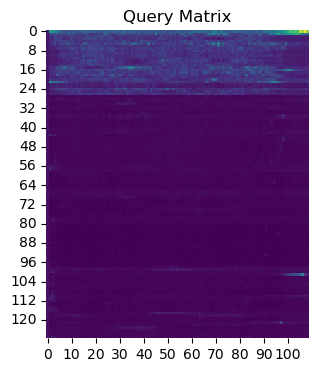

In [35]:
query_matrix = attention_weights[1]
query_matrix = np.sum(query_matrix, axis=(0))
# Reshape the query matrix by flipping the axes
query_matrix = np.transpose(query_matrix)
print(query_matrix.shape)
display_output_heatmap(query_matrix, "Query Matrix")

# Sum the different arrays to give a score per residue

In [4]:
df_rmsds = pd.read_csv('../../data/rmsd_dataset.csv')

pdb_id_1 = '5fog_d'
pdb_id_2 = '1c3h_a'
pdb_id_3 = '1bht_a'
pdb_id_4 = '1ay1_h'
pdb_id_5 = '1a2x_a'



def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


def normalise(data):
    data = np.reshape(data, (1, len(data)))
    data = data - np.mean(data)
    data = data / np.std(data)
    return data

In [6]:
PDB_ID = pdb_id_1 + '_128'

query_stack = torch.load('../../data/query_col_attentions/query_col_attentions_' + PDB_ID + '.pt')
query_row = query_stack[1]
query_col = query_stack[0]
query_sums = query_col + query_row
print(query_sums.shape)

print(attention_weights.shape)
attention_maps = attention_weights[0, 0:12, 0:12, :, :, :].cpu().numpy()
summed_maps = np.sum(attention_maps, axis=(0, 1))

query_col = summed_maps[:, 0, :]
query_row = summed_maps[:, :, 0]
query_col = np.reshape(query_col, (query_col.shape[0], query_col.shape[1]))
query_row = np.reshape(query_row, (query_row.shape[0], query_row.shape[1]))
query_sums = query_col + query_row
query_sums = np.transpose(query_sums)
query_row = np.transpose(query_row)
query_col = np.transpose(query_col)

query_score = normalise(np.sum(query_sums, axis=0)[1:])
labels = literal_eval(df_rmsds[df_rmsds['Unnamed: 0'].str.contains(PDB_ID.split('_')[0])].iloc[0, 1])
labels = normalise(labels)

if PDB_ID.endswith('_32'):
    query_score_32 = np.copy(query_score)
elif PDB_ID.endswith('_64'):
    query_score_64 = np.copy(query_score)
else:
    query_score_128 = np.copy(query_score)

(128, 293)
torch.Size([1, 12, 12, 177, 128, 128])


NameError: name 'query_score_64' is not defined

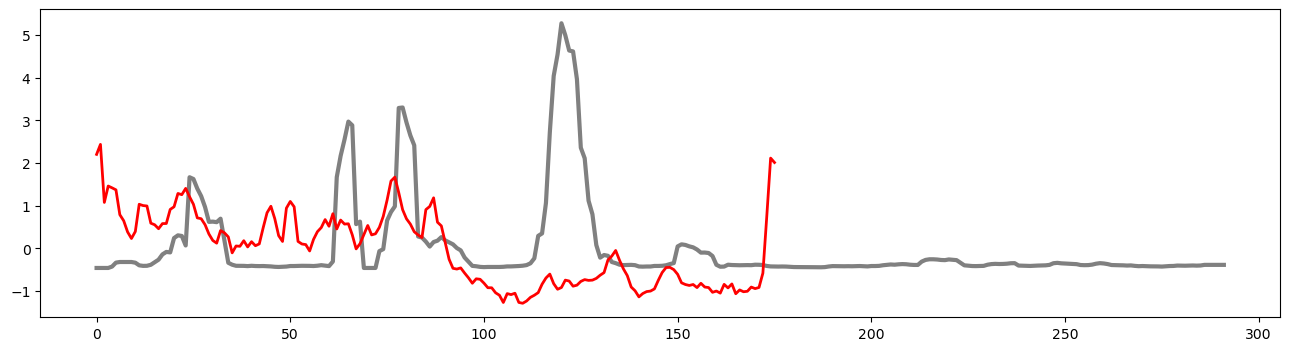

In [7]:
SELECT_INDEX = 22

select_sum_score = normalise(query_sums[SELECT_INDEX])
select_col_score = normalise(query_col[SELECT_INDEX])
select_row_score = normalise(query_row[SELECT_INDEX])

fig = plt.figure(figsize=(16, 4))
plt.plot(labels[0], lw=3, color='grey')

plt.plot(smooth(query_score_128[0],3), lw=2, color='red')
plt.plot(smooth(query_score_64[0],3), lw=2, color='blue')
plt.plot(smooth(query_score_32[0],3), lw=2, color='cyan')

#plt.plot(smooth(select_sum_score[0],2), lw=1, color='orange')
#plt.plot(smooth(select_col_score[0],3), lw=1, color='red')
#plt.plot(smooth(select_row_score[0],3), lw=1, color='blue')

plt.title("Query Score: " + PDB_ID + " (Smoothed)")
plt.legend(['Label', 'Query Score 128', 'Query Score 64', 'Query Score 32'])
plt.show()


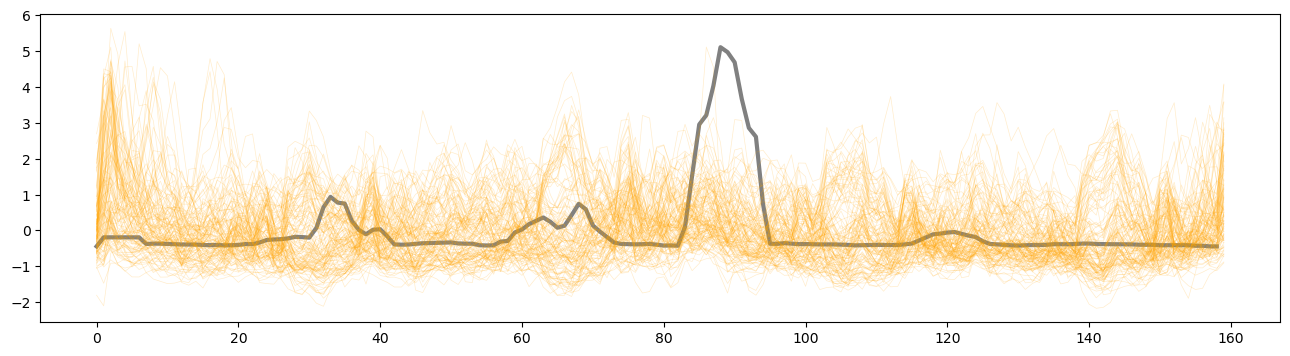

In [347]:
labels = literal_eval(df_rmsds[df_rmsds['Unnamed: 0'].str.contains(PDB_ID)].iloc[0, 1])
labels = normalise(labels)

fig = plt.figure(figsize=(16, 4))
plt.plot(labels[0], lw=3, color='grey')

# Plot every row in the query sums
for i in range(query_sums.shape[0]):
    plt.plot(smooth(normalise(query_sums[i])[0], 2), lw=0.5, alpha=0.2, color='orange')


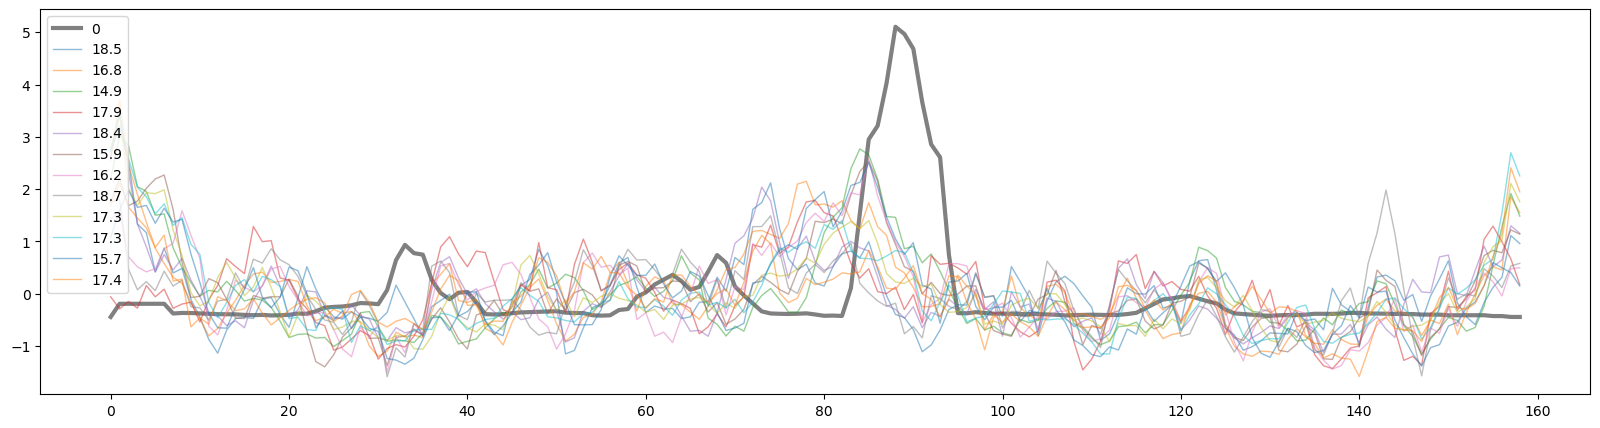

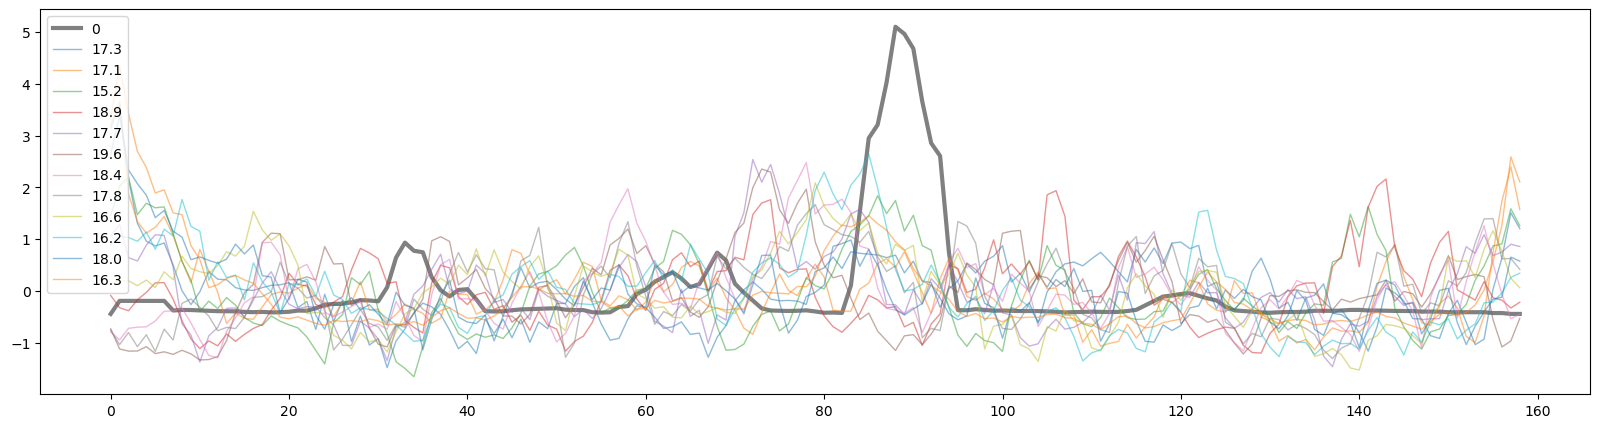

In [354]:
def euclidean_distance(x,y):
  return np.linalg.norm(x - y)

fig = plt.figure(figsize=(20, 5))
plt.plot(labels[0], lw=3, color='grey')
summed_maps = np.sum(attention_maps, axis=(0))
dist_list = [0]
for i in range(12):
    layer = summed_maps[i]
    query_col = layer[:, 0, :]
    query_row = layer[:, :, 0]
    query_col = np.reshape(query_col, (query_col.shape[0], query_col.shape[1]))
    query_row = np.reshape(query_row, (query_row.shape[0], query_row.shape[1]))
    query_sums = query_col + query_row
    query_sums = np.transpose(query_sums)
    query_score = normalise(np.sum(query_sums, axis=0)[1:])
    dist_list.append(round(euclidean_distance(query_score[0], labels[0]), 1))
    plt.plot(smooth(query_score[0],3), lw=1, alpha=0.5)
plt.legend(dist_list)
plt.show()

fig = plt.figure(figsize=(20, 5))
plt.plot(labels[0], lw=3, color='grey')
summed_maps = np.sum(attention_maps, axis=(1))
dist_list = [0]
for i in range(12):
    layer = summed_maps[i]
    query_col = layer[:, 0, :]
    query_row = layer[:, :, 0]
    query_col = np.reshape(query_col, (query_col.shape[0], query_col.shape[1]))
    query_row = np.reshape(query_row, (query_row.shape[0], query_row.shape[1]))
    query_sums = query_col + query_row
    query_sums = np.transpose(query_sums)
    query_score = normalise(np.sum(query_sums, axis=0)[1:])
    dist_list.append(round(euclidean_distance(query_score[0], labels[0]), 1))
    plt.plot(smooth(query_score[0],3), lw=1, alpha=0.5)
plt.legend(dist_list)
plt.show()

In [ ]:
def euclidean_distance(x,y):
  return np.linalg.norm(x - y)

fig = plt.figure(figsize=(20, 5))
plt.plot(labels[0], lw=3, color='grey')
summed_maps = np.sum(attention_maps, axis=(0))
dist_list = [0]
for i in range(12):
    layer = summed_maps[i]
    query_col = layer[:, 0, :]
    query_row = layer[:, :, 0]
    query_col = np.reshape(query_col, (query_col.shape[0], query_col.shape[1]))
    query_row = np.reshape(query_row, (query_row.shape[0], query_row.shape[1]))
    query_sums = query_col + query_row
    query_sums = np.transpose(query_sums)
    query_score = normalise(np.sum(query_sums, axis=0)[1:])
    dist_list.append(round(euclidean_distance(query_score[0], labels[0]), 1))
    plt.plot(smooth(query_score[0],3), lw=1, alpha=0.5)
plt.legend(dist_list)
plt.show()

fig = plt.figure(figsize=(20, 5))
plt.plot(labels[0], lw=3, color='grey')
summed_maps = np.sum(attention_maps, axis=(1))
dist_list = [0]
for i in range(12):
    layer = summed_maps[i]
    query_col = layer[:, 0, :]
    query_row = layer[:, :, 0]
    query_col = np.reshape(query_col, (query_col.shape[0], query_col.shape[1]))
    query_row = np.reshape(query_row, (query_row.shape[0], query_row.shape[1]))
    query_sums = query_col + query_row
    query_sums = np.transpose(query_sums)
    query_score = normalise(np.sum(query_sums, axis=0)[1:])
    dist_list.append(round(euclidean_distance(query_score[0], labels[0]), 1))
    plt.plot(smooth(query_score[0],3), lw=1, alpha=0.5)
plt.legend(dist_list)
plt.show()

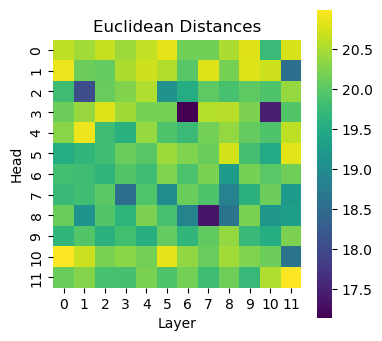

<AxesSubplot: >

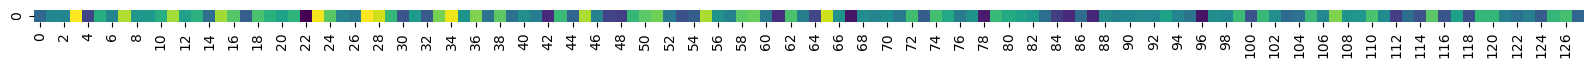

In [361]:



euclidean_distances = np.zeros((12, 12, 128))

summed_maps = attention_maps
for i in range(12):
    for j in range(12):
        layer = summed_maps[i, j]
        query_col = layer[:, 0, :]
        query_row = layer[:, :, 0]
        query_col = np.reshape(query_col, (query_col.shape[0], query_col.shape[1]))
        query_row = np.reshape(query_row, (query_row.shape[0], query_row.shape[1]))
        query_sums = query_col + query_row
        query_sums = np.transpose(query_sums)
        for k in range(128):
            query_score = normalise(query_sums[k])
            #distance = euclidean_distance(query_score[0, 11:-10], labels[0, 10:-10])
            distance = euclidean_distance(query_score[0, 1:], labels[0])
            euclidean_distances[i,j,k] = distance

fig = plt.figure(figsize=(4, 4))
sns.heatmap(np.sum(euclidean_distances, axis=2)/euclidean_distances.shape[2], cmap='viridis', square=True, cbar=True)
plt.title("Euclidean Distances")
plt.xlabel("Layer")
plt.ylabel("Head")
plt.show()

fig = plt.figure(figsize=(20, 4))
seq_distances = np.sum(euclidean_distances[:,:], axis=(0,1))
sns.heatmap(np.reshape(seq_distances, (1, 128)), cmap='viridis', square=True, cbar=False)

# Sort the rows in the query sum by row sum

(128, 138)


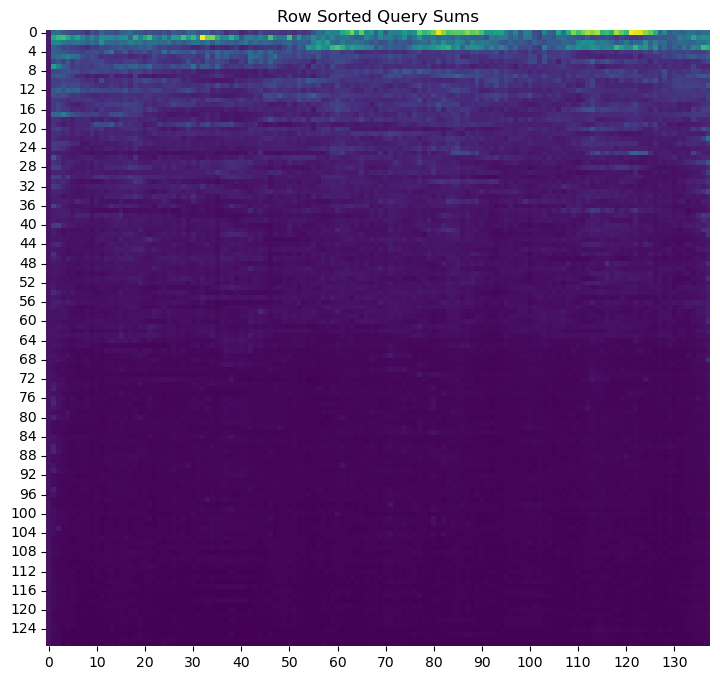

In [37]:
print(query_sums.shape)

# Get the indices of the sorted query sums by average row value
row_sums = np.sum(query_sums, axis=1)

# Sort the row sums and get the indices
sorted_indices = np.argsort(row_sums)[::-1]

# Sort the query sums by the sorted indices
sorted_query_sums = query_sums[sorted_indices, :]

display_output_heatmap(sorted_query_sums, "Row Sorted Query Sums")


# Cluster the query sums

/home/vera/miniconda3/envs/SE3-nvidia/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1]
(128, 138)


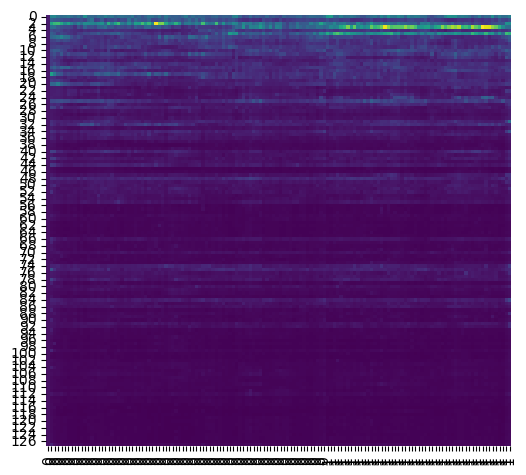

In [152]:
NUM_CLUSTERS = 2

# Cluster the sequence vectors using K-Means
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42).fit(query_sum_list)
print(kmeans.labels_)

# Sort the sequence vectors by cluster label
sorted_query_sum_list = []
for i in range(NUM_CLUSTERS):
    sorted_query_sum_list.append([])
for i in range(len(kmeans.labels_)):
    sorted_query_sum_list[kmeans.labels_[i]].append(query_sum_list[i])
sorted_query_sums = [vector for cluster in sorted_query_sum_list for vector in cluster]

# Stack the sorted sequence vectors into a numpy array
sorted_query_sums = np.stack(sorted_query_sums, axis=1)
print(sorted_query_sums.shape)

# Create a heatmap of the sorted sequence vectors
fig = plt.figure(figsize=(6, 12))

# Sort the kmeans labels
sorted_kmeans_labels = sorted(kmeans.labels_)
sns.heatmap(sorted_query_sums, cmap='viridis', square=True, cbar=False, xticklabels=sorted_kmeans_labels)
plt.show()



In [1]:
def display_output_heatmap(data, title):
    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(86, 8))
    sns.heatmap(data, cmap='viridis', square=True, cbar=False, xticklabels=10, yticklabels=4)
    plt.title(title)
    plt.show()


# Make the maps numpy arrays and sum them
attention_maps = attention_weights[0, 0:12, 0:12, :, :, :].cpu().numpy()
all_summed_maps = np.sum(attention_maps, axis=(1))

for i in range(12):
    summed_maps = all_summed_maps[:,i]
    # col_sums = np.sum(summed_maps, axis=1)
    # col_sums = np.transpose(col_sums)
    # col_sum_list = [col_sums[:, i] for i in range(col_sums.shape[1])]
    # display_output_heatmap(col_sums, "Column Sums")

    query_col = summed_maps[:, 0, :]
    query_row = summed_maps[:, :, 0]
    query_col = np.reshape(query_col, (query_col.shape[0], query_col.shape[1]))
    query_row = np.reshape(query_row, (query_row.shape[0], query_row.shape[1]))
    query_sums = query_col + query_row
    query_sums = np.transpose(query_sums)
    query_sum_list = [query_sums[:, i] for i in range(query_sums.shape[1])]
    #query_sum_list = [query_sums[i, :] for i in range(query_sums.shape[0])]
    display_output_heatmap(query_sums, "Query Sums")

    # print(attention_maps.shape)
    # diagonals = np.zeros((144, attention_maps.shape[3], attention_maps.shape[2]))
    # for i in range(12):
    #     for j in range(12):
    #         for k in range(attention_maps.shape[2]):
    #             diagonals[i * 12 + j, :, k] = np.diag(attention_maps[i, j, k, :, :])
    # diagonal_sums = np.sum(diagonals, axis=0)
    # diagonal_sum_list = [diagonal_sums[:, i] for i in range(diagonal_sums.shape[1])]
    # display_output_heatmap(diagonal_sums, "Diagonal Sums")


NameError: name 'attention_weights' is not defined